<a href="https://colab.research.google.com/github/varunSabnis/pytorch_course_udemy/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, centers=centers, cluster_std=0.4, random_state=123)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

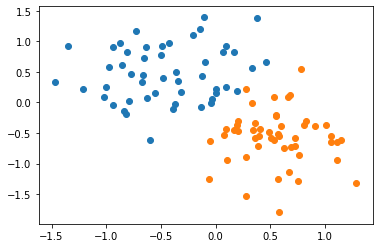

In [6]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    threshold = 0.5
    pred = self.forward(x)
    pred_vals = (pred >= threshold).float()
    return pred_vals

In [0]:
torch.manual_seed(2)
model = Model(2, 1)

In [0]:
w, b = list(model.parameters())
def get_params():
  w1, w2 = w.view(2,1)
  b1 = b[0]
  return(w1.item(), w2.item(), b1.item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'g')
  scatter_plot()

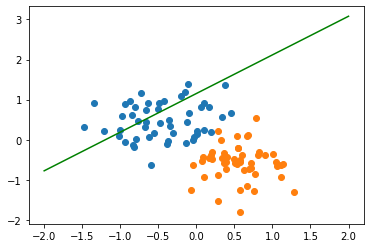

In [11]:
plot_fit("Initial Model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("Epoch : {} , loss : {}".format(i, loss))
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 , loss : 0.6185115575790405
Epoch : 1 , loss : 0.6174639463424683
Epoch : 2 , loss : 0.6164201498031616
Epoch : 3 , loss : 0.6153794527053833
Epoch : 4 , loss : 0.614342451095581
Epoch : 5 , loss : 0.6133086681365967
Epoch : 6 , loss : 0.6122783422470093
Epoch : 7 , loss : 0.6112515330314636
Epoch : 8 , loss : 0.6102280616760254
Epoch : 9 , loss : 0.6092080473899841
Epoch : 10 , loss : 0.6081910729408264
Epoch : 11 , loss : 0.6071775555610657
Epoch : 12 , loss : 0.606167733669281
Epoch : 13 , loss : 0.6051608920097351
Epoch : 14 , loss : 0.604157567024231
Epoch : 15 , loss : 0.6031574606895447
Epoch : 16 , loss : 0.602160632610321
Epoch : 17 , loss : 0.6011670827865601
Epoch : 18 , loss : 0.6001767516136169
Epoch : 19 , loss : 0.599189817905426
Epoch : 20 , loss : 0.5982059240341187
Epoch : 21 , loss : 0.5972254276275635
Epoch : 22 , loss : 0.5962479114532471
Epoch : 23 , loss : 0.5952739119529724
Epoch : 24 , loss : 0.5943028926849365
Epoch : 25 , loss : 0.5933352112770081
E

Text(0.5, 0, 'epochs')

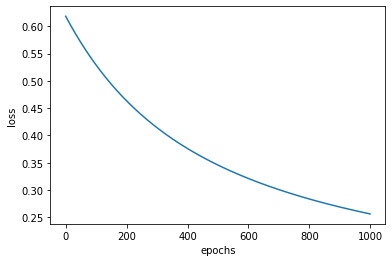

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")

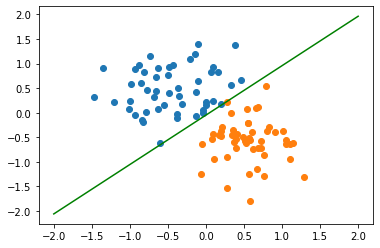

In [15]:
plot_fit("Trained Model")

Predicted probability for red point : 0.7962783575057983 and belongs to class tensor([1.])
Predicted probability for black point : 0.05055497586727142 and belongs to class tensor([0.])


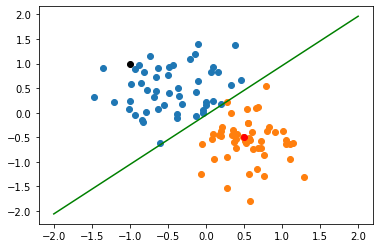

In [16]:
point1 = torch.Tensor([0.5, -0.5])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Predicted probability for red point : {} and belongs to class {}".format(model.forward(point1).item(), model.predict(point1)))
print("Predicted probability for black point : {} and belongs to class {}".format(model.forward(point2).item(), model.predict(point2)))
plot_fit("Trained Model with new points")

In [0]:
# function to measure accuracy of model on training set
def measure_accuracy():
  y_pred = model.predict(x_data)
  tp = (y_pred*y_data).sum().to(torch.float64)
  tn = ((1 - y_pred)*(1 - y_data).sum().to(torch.float64))
  fp = ((y_pred)*(1 - y_data)).sum().to(torch.float64)
  fn = ((1 - y_pred)*y_data).sum().to(torch.float64)
  
  epsilon = 1e-7
  
  precision = tp / (tp + fp + epsilon)
  print("Precision : {}".format(precision))
  recall = tp / (tp + fn + epsilon)
  print("Recall : {}".format(recall))
    
  f1 = 2* (precision*recall) / (precision + recall + epsilon)
  print("F-1 score : {}".format(f1))

In [26]:
measure_accuracy()

Precision : 0.999999998
Recall : 0.999999998
F-1 score : 0.9999999480000024
